# TP3

In [82]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.diagnostic import lilliefors

n >= 30 && n * p * (1-p) >= 9 --> binomial aproximado
n < 30 || n * p * (1-p) < 9 --> binomial exato

## 1

H0: p = 0.45 vs H1: p > 0.45

Tn ~ Bi (25, 0.45)
p-value = P(tn >= 13)

In [83]:
# hard way
n = 25
p = 0.45
p_value = 1 - stats.binom(25, p).cdf(12)
print('valor de prova:', round(p_value, 4))

valor de prova: 0.3063


In [84]:
# easy way
res1 = stats.binomtest(13, 25, 0.45, alternative='greater')
print(res1)
print('p-value:', round(res1.pvalue, 4))

# Conclusao: nao se rejeita a hipotese nula

BinomTestResult(k=13, n=25, alternative='greater', statistic=0.52, pvalue=0.30632396592448247)
p-value: 0.3063


## 2

Pv: vermelho
Pa: azul
H0: Pv = Pa vs H1: Pv > Pa
H0: Pv = 0.5 vs H1: Pv > 0.5

In [85]:
res2 = stats.binomtest(15, 19, 0.5, alternative='greater')
print(res2)
print('p-value:', round(res2.pvalue, 4))

BinomTestResult(k=15, n=19, alternative='greater', statistic=0.7894736842105263, pvalue=0.00960540771484375)
p-value: 0.0096


## 3

H0: P = 0.3 vs H1: P > 0.3

In [86]:
nbos = 2000
nsuc = 700
pnull = 0.3
res3 = proportions_ztest(nsuc, nbos, pnull, prop_var=pnull, alternative='larger')
print('valor de prova:', res3[1])

# Conclusao: O valor de prova é da ordem de 10^-7 e portanto rejeitamos H0. Ou seja com indice de significancia de 5% que o partido P irá ter uma percentagem superior a 30%.

valor de prova: 5.317746339763708e-07


## 4

In [87]:
# H0: Pa = Pb vs H1: Pa != Pb
data4 = pd.read_csv('Ex4.csv', sep=';')
data4.head()

,participante,produto
0,1,B
1,2,B
2,3,A
3,4,A
4,5,A


nobs = data4['participante'].shape[0]
print('Numero de observacoes:', nobs)
nsuc = (data4['produto'] == 'A').sum()
print('Numero de sucessos (numero de escolhas de A):', nsuc)
p = nsuc / nobs
print('condicao nxpx(1-p):', round(nobs * p * (1 - p), 1))

In [88]:
res4 = proportions_ztest(nsuc, nobs, 0.5, prop_var=0.5, alternative='two-sided')
print('pvalue:', round(res4[1], 4))

# Conclusao: Nao se rejeita a hipotese nula. Ou seja nao ha evidencia estatistica, com nivel de significancia de 5%, que a proporcao das pessoas que preferem o produto A seja diferente da proporcao de pessoas que prefere o produto B.

pvalue: 0.0


## 5

In [89]:
data5 = pd.read_csv('Ex5.csv', sep=';')
freq_obs =  [(data5['Resultado'].tolist()).count(num) for num in range(1, 6+1)]
print('frequencia observadas:', freq_obs)
freq_esp = len(data5['Resultado'].tolist()) / 6
print('frequrencia esperada:', freq_esp)
freq_teorica=[freq_esp] * 6
print('freq_teorica:', freq_teorica)
chi2, p_value = stats.chisquare(freq_obs, freq_teorica)
print('valor de estatistica teste:', chi2)
print('valor de prova', round(p_value, 4))

# Conculsao: Nao se rejeita a hipotese nula. Ou seja nao ha razao para se supor que o dado esta desiquilibrado. 

frequencia observadas: [12, 13, 5, 7, 12, 11]
frequrencia esperada: 10.0
freq_teorica: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
valor de estatistica teste: 5.2
valor de prova 0.392


## 6

In [90]:
tempos = [25.36, 24.64, 25.17, 24.56, 24.56, 24.80, 25.21, 25.38, 24.55]
shapiro_t = stats.shapiro(tempos)
print('p-value (teste à normalidade de Shapiro):', shapiro_t.pvalue)

p-value (teste à normalidade de Shapiro): 0.040639668703079224


In [91]:
lillef_t = lilliefors(tempos)
print('p-value ( teste à normal  Lillefors):', lillef_t[0])

p-value ( teste à normal  Lillefors): 0.2211211285843797


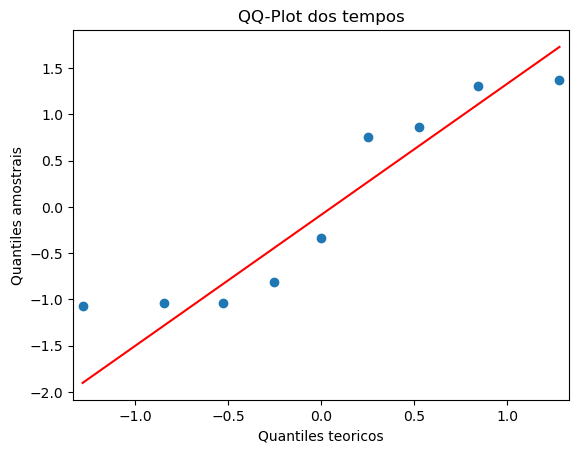

In [94]:
import statsmodels.api as sm
sm.qqplot(np.array(tempos), line='q', fit=True)

plt.title('QQ-Plot dos tempos')
plt.xlabel('Quantiles teoricos')
plt.ylabel('Quantiles amostrais')

plt.show()

In [95]:
mediana_null=25
temparray=np.array(tempos)
statistic, p_value = stats.wilcoxon(temparray -mediana_null, alternative='greater')
print('p-value (teste de Wilcoxon):', p_value)

# Conclusao: Nao ha evidencia estatistica que a mediana (e a media neste caso) do tempo de arranque seja superior a 25 segundos com um nivel de significancia de 5%.

p-value (teste de Wilcoxon): 0.849609375
